In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 3.6 MB/s eta 0:00:00


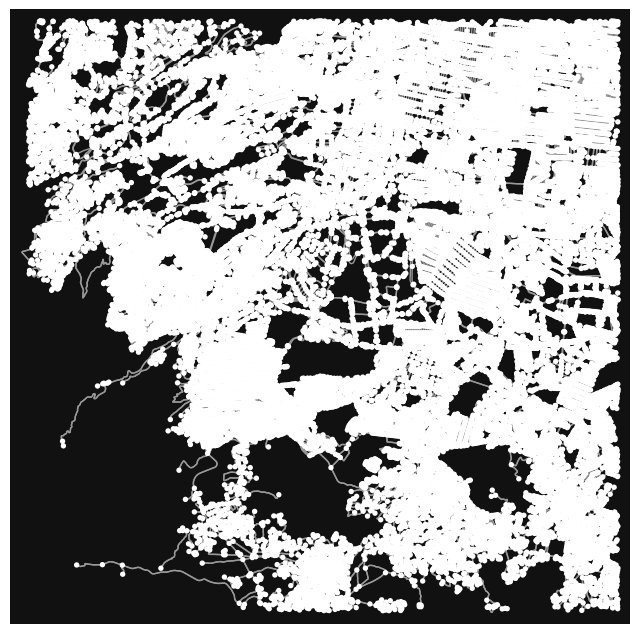

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
import osmnx as ox
G = ox.graph_from_address('Periférico, Fraccionamiento Insurgentes Cuicuilco, Coyoacán, Santa Fe, Mexico City, 04500, Mexico', dist=10000, network_type='drive')
ox.plot_graph(G)

#Aguascalientes, Municipio de Aguascalientes, Aguascalientes, 20000, Mexico

In [3]:
id = 1701785640
print('Nodo de origen: ' + str(G.nodes[id]))
print('Nodos sucesores')
for node in G.successors(id):
    print(node, G.nodes[node])

Nodo de origen: {'y': 19.302857, 'x': -99.1872269, 'street_count': 3}
Nodos sucesores
275048327 {'y': 19.3024259, 'x': -99.1912069, 'street_count': 3}
275047945 {'y': 19.3028117, 'x': -99.1883528, 'street_count': 3}


In [4]:
print(G.out_edges(id, data = 'length'))

[(1701785640, 275048327, 420.42199999999997), (1701785640, 275047945, 118.367)]


In [5]:
G2 = ox.speed.add_edge_speeds(G)
print(G2.out_edges(id, data = 'speed_kph'))
G3 = ox.speed.add_edge_travel_times(G)
print(G3.out_edges(id, data = 'travel_time'))

[(1701785640, 275048327, 75.1), (1701785640, 275047945, 49.0)]
[(1701785640, 275048327, 20.2), (1701785640, 275047945, 8.7)]


In [6]:
buildings = ox.features_from_address('Tec de Monterrey campus Guadalajara, Zapopan, Jalisco, 45201, México', tags = {'building': True}, dist=100)
print(buildings)

                        wheelchair  \
element_type osmid                   
way          154879959         yes   
             154879963         NaN   
             555334481         NaN   
             555372923         yes   
             566462592         NaN   
             1097434507        NaN   
             1097437985        NaN   
             1097437986        NaN   
             1097437987        NaN   
             1097437988        NaN   
             1097437989        NaN   
             1097438004        NaN   
             1097438005        NaN   
             1097439677        NaN   
             1097439679        NaN   
             1097445059        NaN   
             1097445060        NaN   
             1097445061        NaN   
             1097445062        NaN   
             1097445063        NaN   

                                                                  geometry  \
element_type osmid                                                           
way    

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [7]:
import geopy.distance

orig_node = 1701785640
dest_node = 275048327
coord_orig = G.nodes[orig_node]['y'], G.nodes[orig_node]['x']
coord_dest = G.nodes[dest_node]['y'], G.nodes[dest_node]['x']
dist = geopy.distance.distance(coord_orig, coord_dest).m
print(dist)

421.0120441003734


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


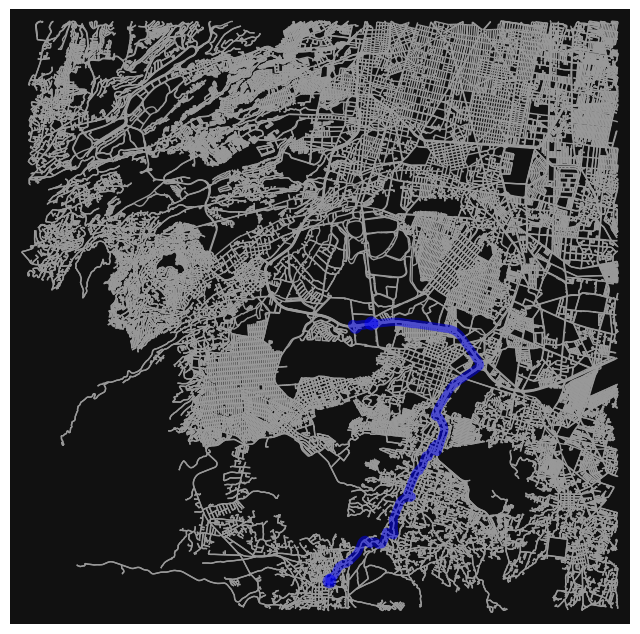

Distancia recorrida por BFS: 17617.833000000006 metros


<ipython-input-57-757d5478f056>:13: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))


In [57]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

orig_node = 1701785640
dest_node = 8344149338

def bfs_path(graph, orig_node, dest_node):
    path = nx.shortest_path(graph, source=orig_node, target=dest_node)
    route = ox.plot_graph_route(graph, path, route_color='b', route_linewidth=6, node_size=0)

    # Calcular la longitud de la ruta
    route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))

    print(f'Distancia recorrida por BFS: {route_length} metros')

    plt.show()

bfs_route = bfs_path(G, orig_node, dest_node)

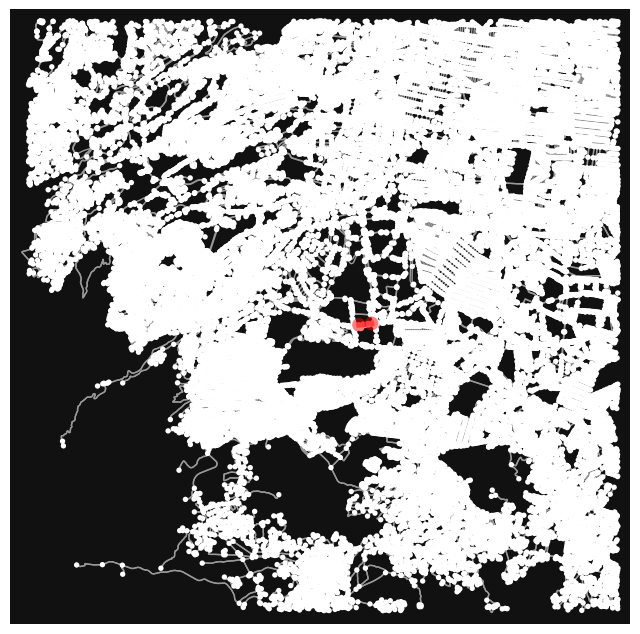

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [49]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

orig_node = 1701785640
dest_node = 275048327

def dfs_path(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (node, path) = stack.pop()
        for next_node in graph.neighbors(node):
            if next_node not in path:
                if next_node == goal:
                    return path + [next_node]
                else:
                    stack.append((next_node, path + [next_node]))

# Uso
dfs_route = dfs_path(G, orig_node, dest_node)
ox.plot_graph_route(G, dfs_route)

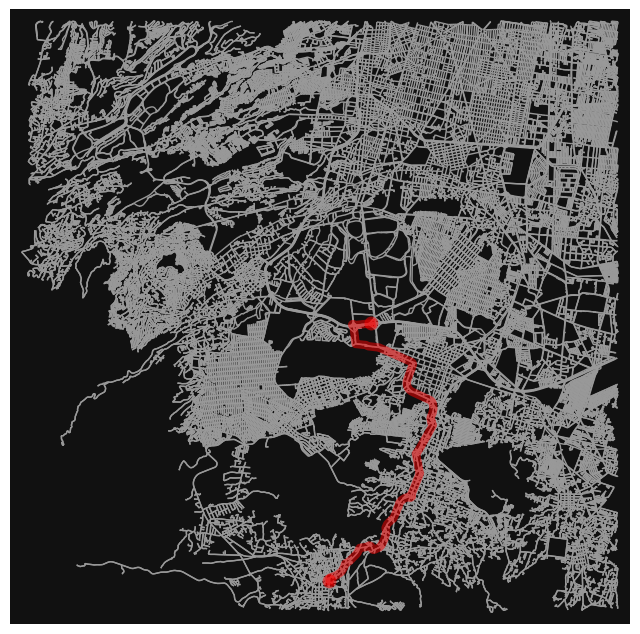

Distancia recorrida por UCS: 13492.781000000008 metros


<ipython-input-58-5141f6ccbc4d>:13: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))


In [58]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

orig_node = 1701785640
dest_node = 8344149338

def ucs_path(graph, orig_node, dest_node):
    path = nx.shortest_path(graph, source=orig_node, target=dest_node, weight='length')
    route = ox.plot_graph_route(graph, path, route_color='r', route_linewidth=6, node_size=0)

    # Calcular la longitud de la ruta
    route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))

    print(f'Distancia recorrida por UCS: {route_length} metros')

    plt.show()

ucs_route = ucs_path(G, orig_node, dest_node)

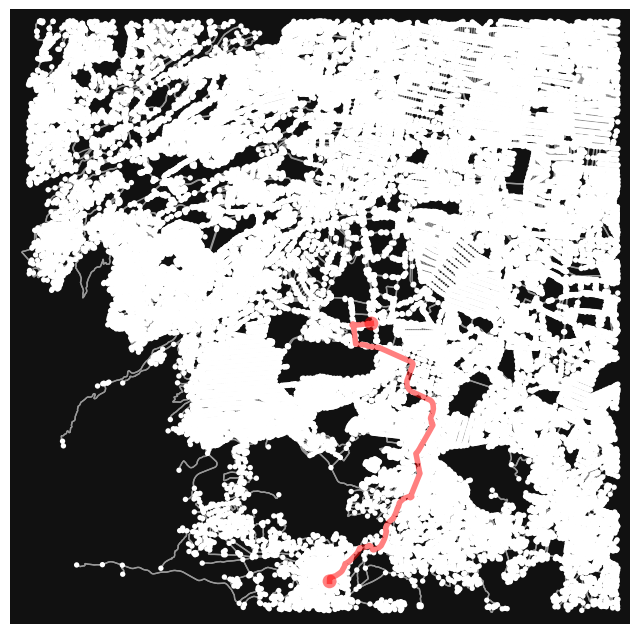

In [32]:
def a_star_path(graph, start, goal):
    a_star_route = nx.astar_path(graph, start, goal, weight='length')
    return a_star_route

# Definir nodos de origen y destino
orig_node_a_star = 1701785640
dest_node_a_star = 8344149338

# Calcular ruta con A*
a_star_route = a_star_path(G, orig_node_a_star, dest_node_a_star)

# Plotear el grafo con la ruta
fig, ax = ox.plot_graph_route(G, a_star_route)

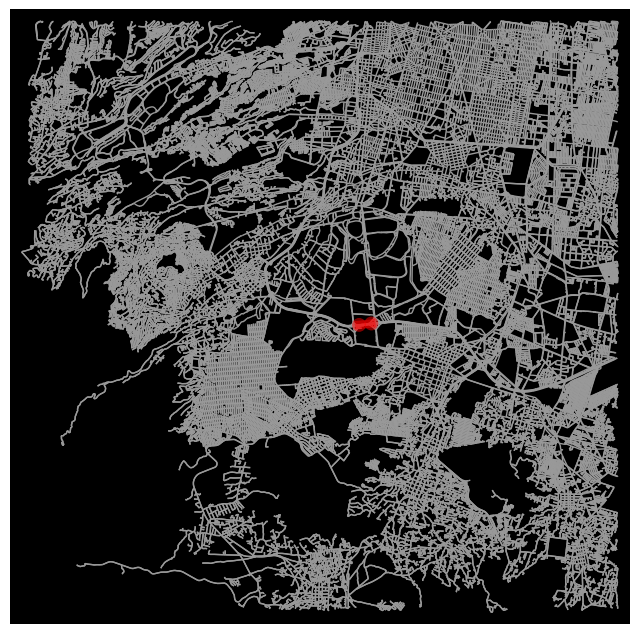

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import geopy.distance

def euclidean_dist(graph, node1, node2):
    coord1 = (graph.nodes[node1]['y'], graph.nodes[node1]['x'])
    coord2 = (graph.nodes[node2]['y'], graph.nodes[node2]['x'])
    return geopy.distance.distance(coord1, coord2).meters

def ida_star(graph, start_node, goal_node, heuristic_func, max_cost=float('inf')):
    def search(node, path, cost, f_cost):
        nonlocal found, min_cost
        h = heuristic_func(graph, node, goal_node)
        f_cost = cost + h

        if f_cost > max_cost:
            return f_cost

        if node == goal_node:
            found = True
            return cost

        for successor in graph.successors(node):
            if successor not in path:
                path.append(successor)
                new_cost = graph.get_edge_data(node, successor).get('travel_time', 1)
                result = search(successor, path, cost + new_cost, f_cost)
                if found:
                    return result
                path.pop()

        return min_cost

    found = False
    min_cost = float('inf')
    path = [start_node]

    while not found:
        cost = search(start_node, path, 0, 0)
        if found:
            break
        if cost >= max_cost:
            break
        min_cost = cost
        max_cost = cost

    return path

# Nodo de destino: 8344149338
orig_node = 1701785640
dest_node = 275048327

# Aplicar IDA* y obtener la ruta
path = ida_star(G, orig_node, dest_node, euclidean_dist)

# Imprimir el mapa con la ruta marcada
fig, ax = ox.plot_graph_route(G, path, route_linewidth=6, node_size=0, bgcolor='k', route_color='r')
plt.show()